## Import Libraries

In [46]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Load Dataset

In [2]:
df = pd.read_csv("retail_price.csv")

In [3]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [5]:
df.shape

(676, 30)

## Data Cleaning

In [6]:
df.info

<bound method DataFrame.info of     product_id product_category_name  month_year  qty  total_price  \
0         bed1        bed_bath_table  01-05-2017    1        45.95   
1         bed1        bed_bath_table  01-06-2017    3       137.85   
2         bed1        bed_bath_table  01-07-2017    6       275.70   
3         bed1        bed_bath_table  01-08-2017    4       183.80   
4         bed1        bed_bath_table  01-09-2017    2        91.90   
..         ...                   ...         ...  ...          ...   
671       bed5        bed_bath_table  01-05-2017    1       215.00   
672       bed5        bed_bath_table  01-06-2017   10      2090.00   
673       bed5        bed_bath_table  01-07-2017   59     12095.00   
674       bed5        bed_bath_table  01-08-2017   52     10375.00   
675       bed5        bed_bath_table  01-09-2017   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000   45.950000                   39   
1        12.93333

In [10]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

## Exploratory Data Analysis

To understand how selling price is distributed

<function matplotlib.pyplot.show(close=None, block=None)>

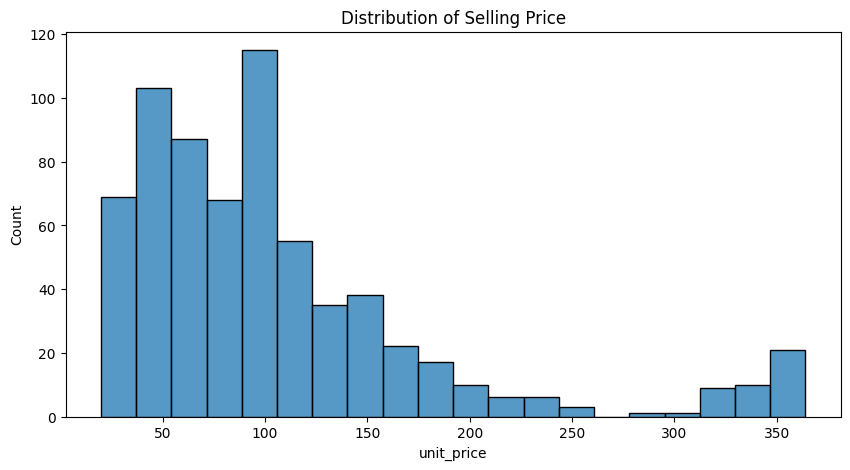

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['unit_price'])
plt.title('Distribution of Selling Price')
plt.show

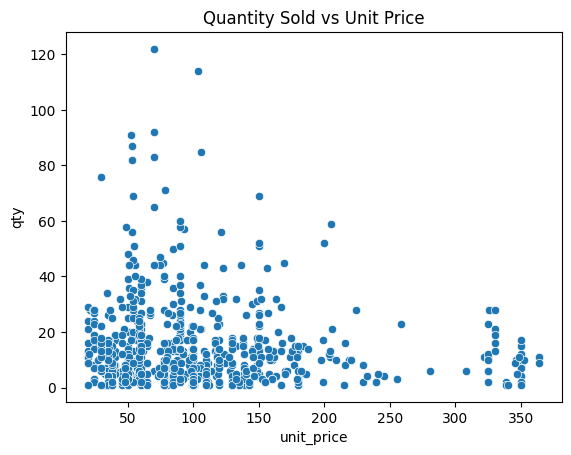

In [15]:
sns.scatterplot(data=df, x='unit_price', y='qty')
plt.title('Quantity Sold vs Unit Price')
plt.show()

#### Correlation heatmap

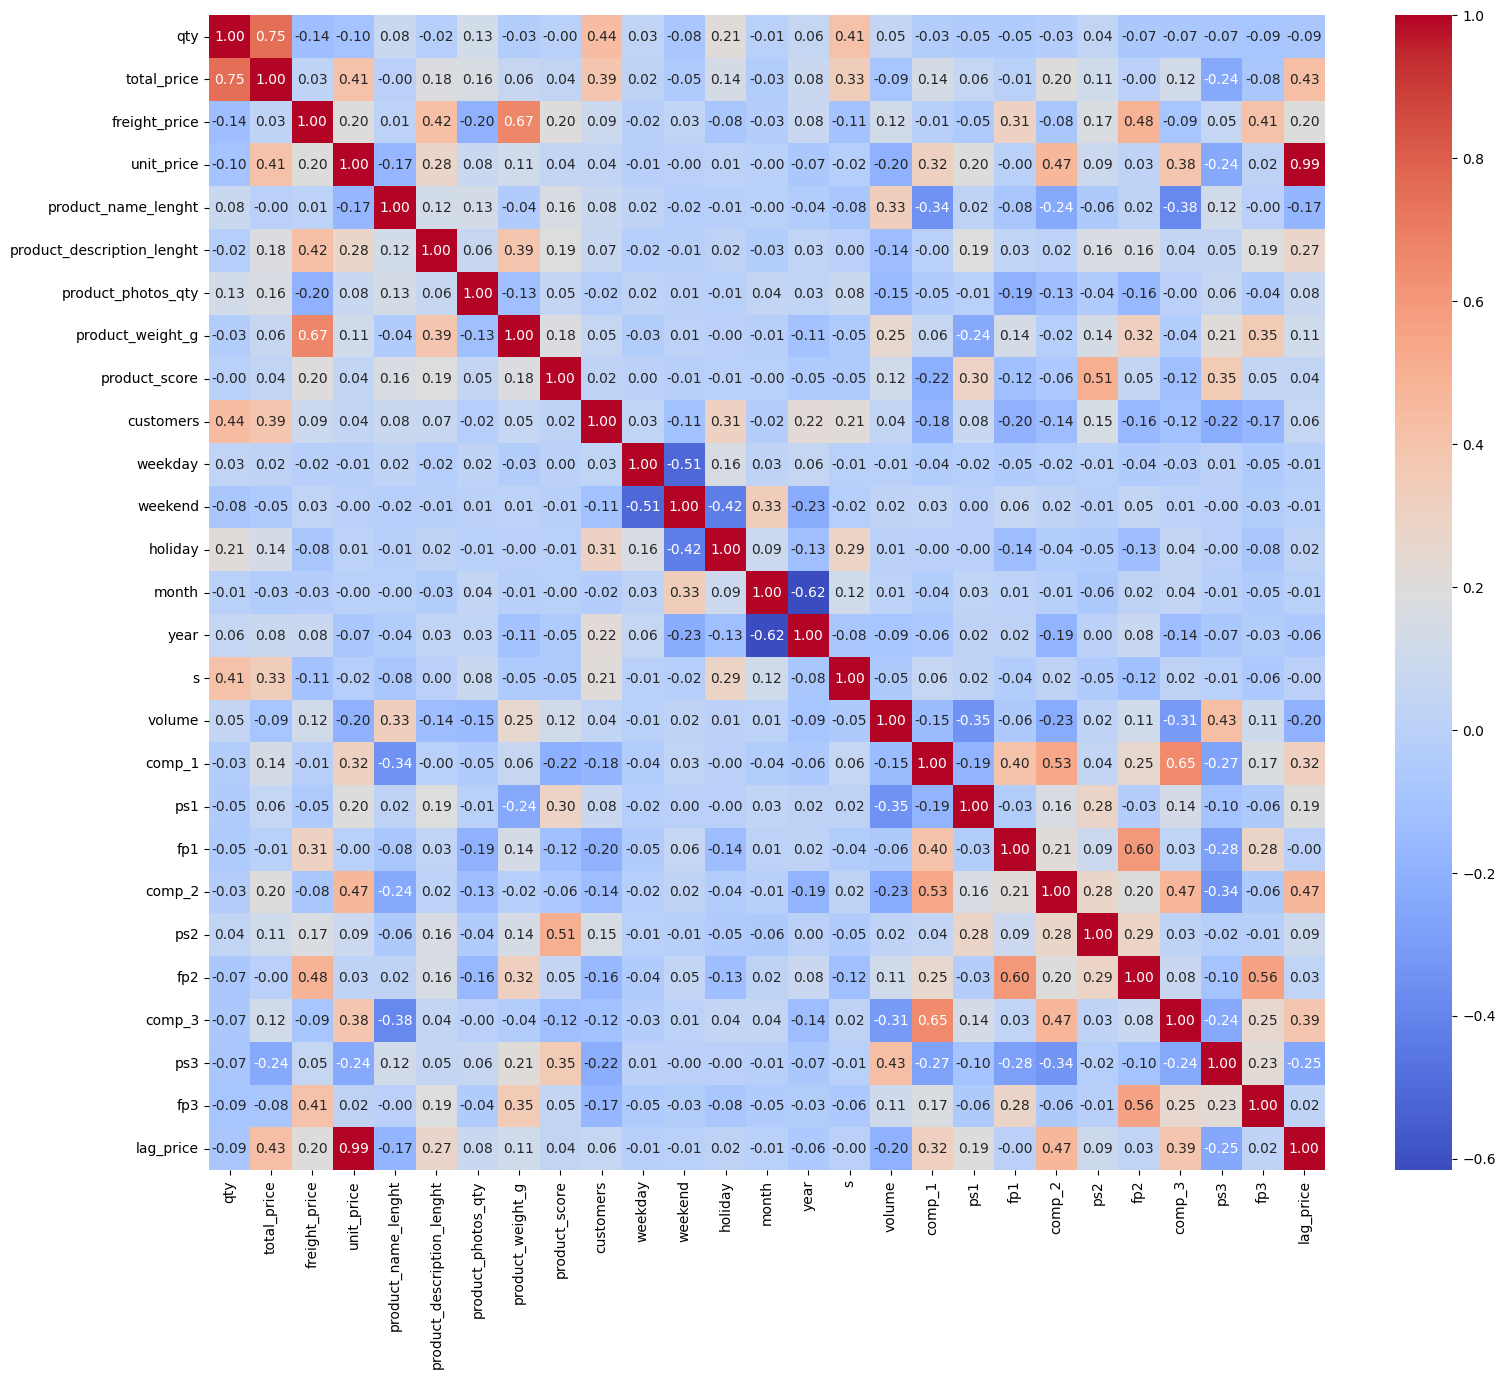

In [17]:
plt.figure(figsize=(18, 15)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f") 
plt.show()

#### Box plot for outliers

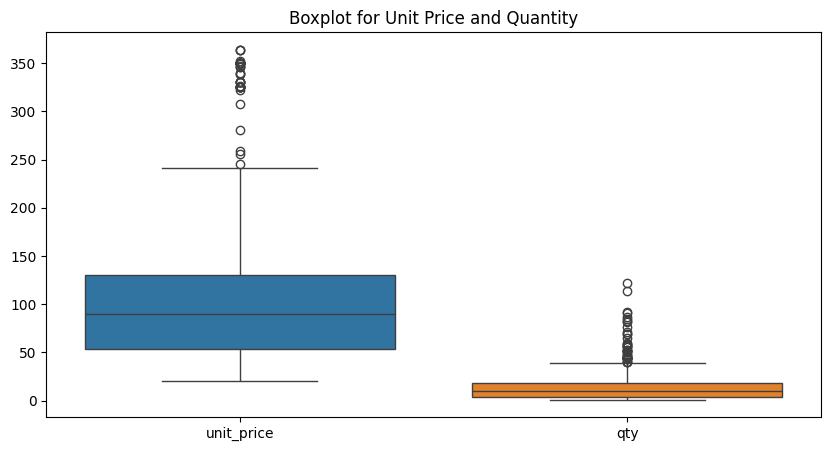

In [18]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['unit_price', 'qty']])
plt.title('Boxplot for Unit Price and Quantity')
plt.show()

## Feature Engineering

Calculate revenue and cost metrics if not already available

In [19]:
df['Revenue'] = df['unit_price'] * df['qty']
df['Cost Price'] = df['unit_price'] * 0.7  # assume 30% markup
df['Profit'] = df['Revenue'] - (df['unit_price'] * df['qty'])
df['Profit_pct'] = (df['Profit'] / df['Revenue']) * 100
df['Cost_pct'] = ((df['Cost Price'] * df['qty']) / df['Revenue']) * 100

### Year-over-Year analysis

Year-over-Year Average:
          Revenue  Profit
year                     
2017  1275.169881     0.0
2018  1555.187308     0.0


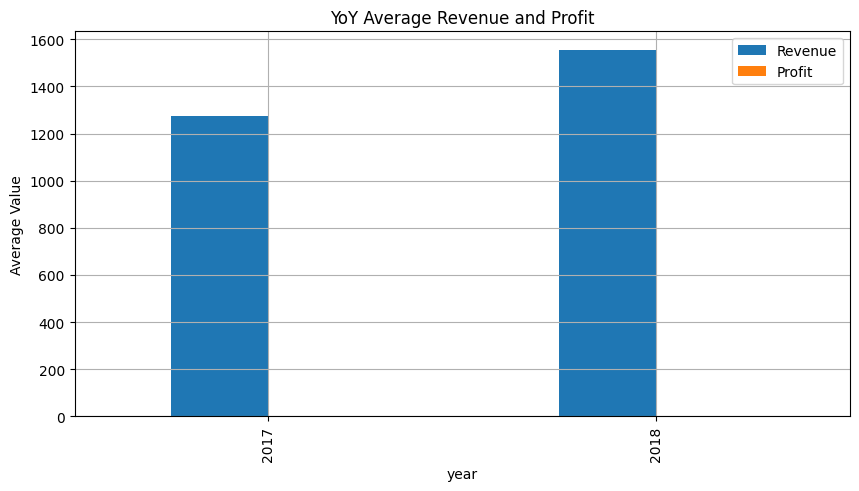

In [20]:
if 'year' in df.columns:
    yoy_avg = df.groupby('year')[['Revenue', 'Profit']].mean()
    print("Year-over-Year Average:")
    print(yoy_avg)
    yoy_avg.plot(kind='bar', figsize=(10, 5))
    plt.title("YoY Average Revenue and Profit")
    plt.ylabel("Average Value")
    plt.grid(True)
    plt.show()

## Visualize Revenue and Profit

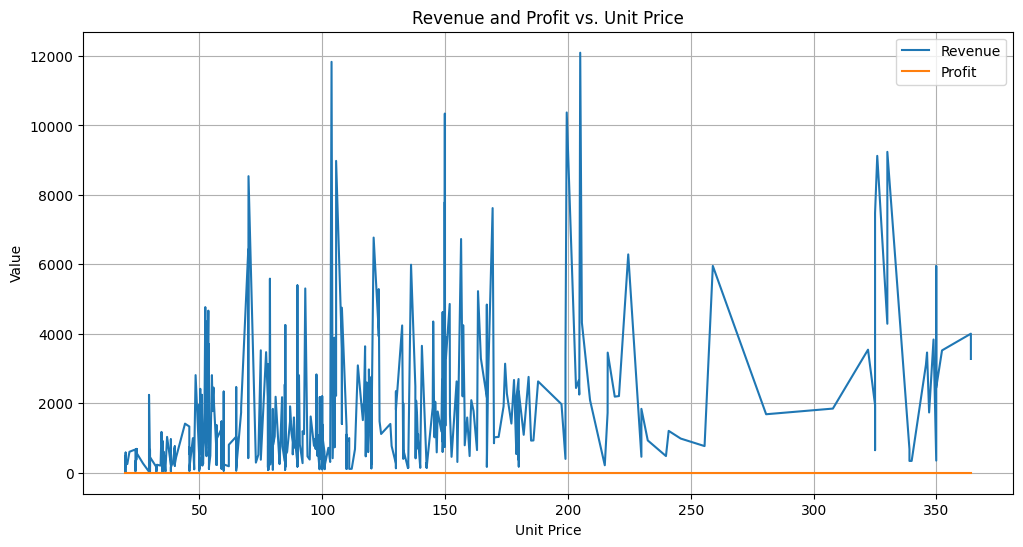

In [22]:
# Sort the DataFrame by unit_price for a cleaner plot
df_sorted = df.sort_values(by='unit_price')

plt.figure(figsize=(12, 6)) # Optional: Adjust figure size for better viewing
plt.plot(df_sorted['unit_price'], df_sorted['Revenue'], label='Revenue')
plt.plot(df_sorted['unit_price'], df_sorted['Profit'], label='Profit')
plt.xlabel('Unit Price')
plt.ylabel('Value')
plt.title('Revenue and Profit vs. Unit Price')
plt.legend()
plt.grid(True)
plt.show()

## Predictive Modeling for Quantity Sold

In [23]:
# Split the data into training and testing sets (80% train, 20% test)
X = df[['unit_price']]
y = df['qty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##  Model Evaluation

In [24]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.003726066769609182
RMSE: 16.43422314716968


#### Interpretation
R² Score (~0.0037): The model explains less than 1% of the variation in quantity sold. This means the linear regression model is almost no better than simply guessing the average.

RMSE (~16.43): On average, model's prediction is off by 16 units from the actual value.

## Optimal Pricing Simulation

In [25]:
price_range = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
demand_pred = model.predict(price_range.reshape(-1, 1))
avg_cost = df['Cost Price'].mean()
profit = (price_range - avg_cost) * demand_pred
optimal_index = np.argmax(profit)
optimal_price = price_range[optimal_index]
print(f"Optimal Price: ${optimal_price:.2f}")

Optimal Price: $364.00


/Users/kiranbele/Downloads/Pricing-Model/pmenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Plot Optimal Strategy

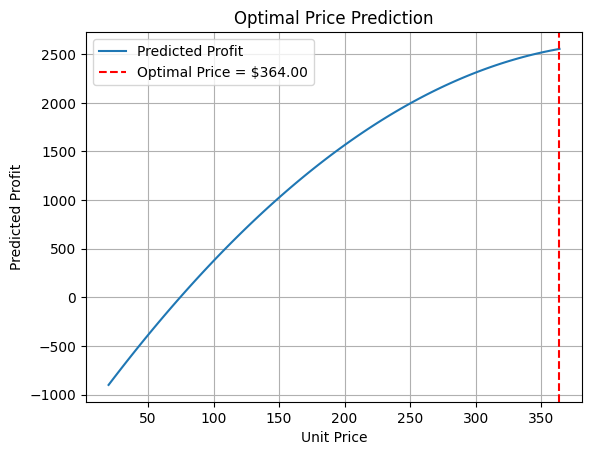

In [26]:
plt.plot(price_range, profit, label='Predicted Profit')
plt.axvline(optimal_price, color='r', linestyle='--', label=f'Optimal Price = ${optimal_price:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Predicted Profit')
plt.title('Optimal Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

## Predictive Modeling for Quantity Sold (Random Forest Regressor)

Using more features for better performance

In [27]:
features = ['unit_price', 'freight_price', 'comp_1', 'ps1', 'holiday', 'month']
X = df[features]
y = df['qty']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [32]:
y_pred = rf_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R2 Score: 0.34368154943877827
Random Forest RMSE: 13.338810495736734


#### Model Performance Summary:
R² Score: ~0.34
→ Random Forest model now explains 34% of the variation in quantity sold, which is a huge improvement over the previous 0.003 R² from linear regression.

RMSE: ~13.34
→ This means, on average, predictions are off by ~13 units. It’s better than before (16.43), showing reduced prediction error.

## Optimal Pricing Simulation

In [33]:
price_range = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
temp_df = pd.DataFrame({
    'unit_price': price_range,
    'freight_price': df['freight_price'].mean(),
    'comp_1': df['comp_1'].mean(),
    'ps1': df['ps1'].mean(),
    'holiday': 0,
    'month': df['month'].mode()[0]
})
demand_pred = rf_model.predict(temp_df)
avg_cost = df['Cost Price'].mean()
profit = (price_range - avg_cost) * demand_pred

optimal_index = np.argmax(profit)
optimal_price = price_range[optimal_index]
print(f"Optimal Price using RF: ${optimal_price:.2f}")

Optimal Price using RF: $364.00


## Plot Optimal Strategy

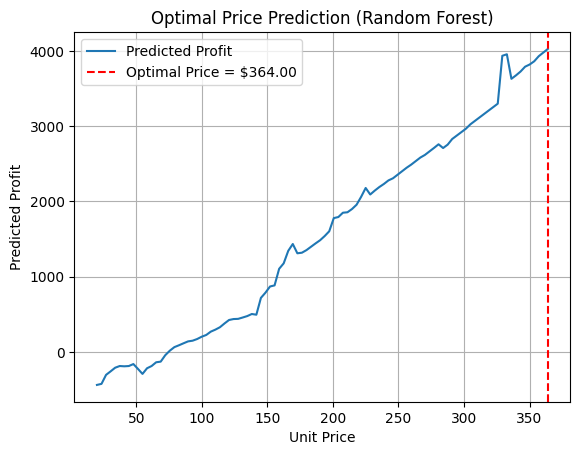

In [34]:
plt.plot(price_range, profit, label='Predicted Profit')
plt.axvline(optimal_price, color='r', linestyle='--', label=f'Optimal Price = ${optimal_price:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Predicted Profit')
plt.title('Optimal Price Prediction (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameter tuning using GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

## Best model from grid search

In [41]:
rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
y_pred = rf_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R2 Score: 0.3801315938544081
Random Forest RMSE: 12.96312015844095


#### Model Interpretation
R² Score: 0.38 — model explains 38% of the variation in quantity sold, which is a solid step forward from 0.34.

RMSE: 12.96 — reduced error compared to earlier 13.33, thanks to better

## Feature Importance Plot

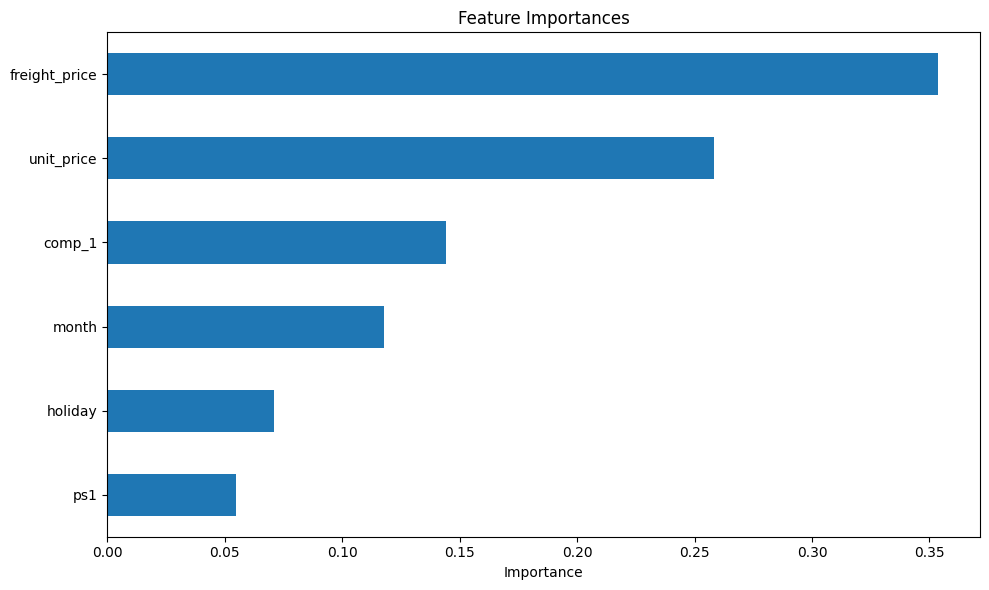

In [43]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

🥇 freight_price is the top driver of quantity sold

🥈 unit_price follows closely, suggesting sensitivity to pricing

🥉 comp_1 and month also have notable influence

ps1 and holiday play a smaller but still measurable role

## XGBoost Model Comparison

In [47]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
xgb_pred = xgb_model.predict(X_test)
print("XGBoost R2 Score:", r2_score(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

XGBoost R2 Score: 0.38242512941360474
XGBoost RMSE: 12.939116298682082


## Optimal Pricing Simulation using XGBoost

In [49]:
price_range = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
temp_df = pd.DataFrame({
    'unit_price': price_range,
    'freight_price': df['freight_price'].mean(),
    'comp_1': df['comp_1'].mean(),
    'ps1': df['ps1'].mean(),
    'holiday': 0,
    'month': df['month'].mode()[0]
})
demand_pred_xgb = xgb_model.predict(temp_df)
profit_xgb = (price_range - avg_cost) * demand_pred_xgb

optimal_index_xgb = np.argmax(profit_xgb)
optimal_price_xgb = price_range[optimal_index_xgb]
print(f"Optimal Price using XGBoost: ${optimal_price_xgb:.2f}")

Optimal Price using XGBoost: $336.19


## Plot Optimal Strategy Comparison

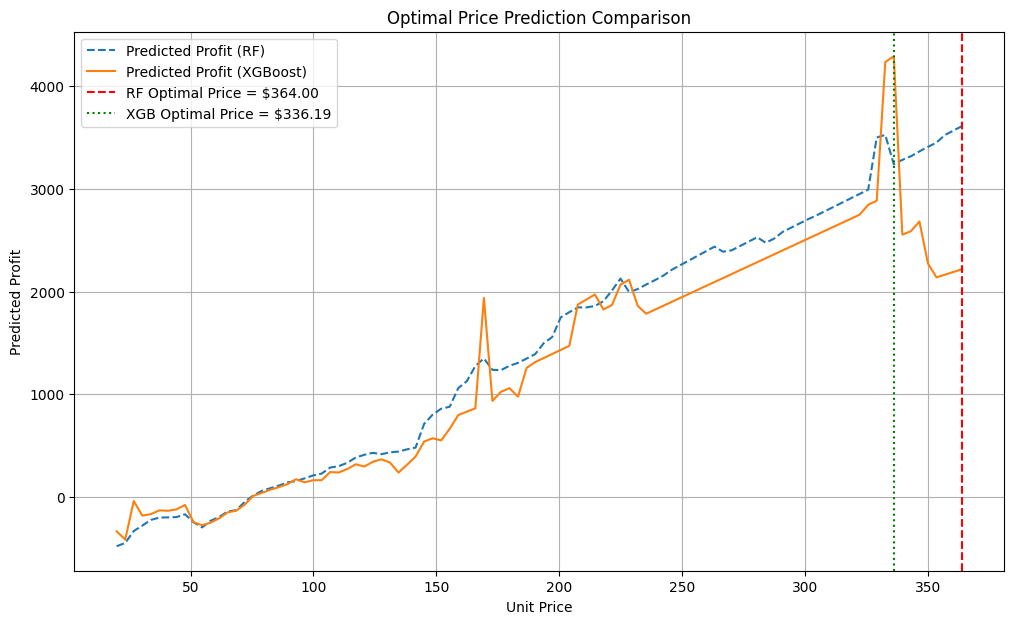

In [51]:
plt.figure(figsize=(12, 7)) # Increased figure size for better readability
plt.plot(price_range, profit, label='Predicted Profit (RF)', linestyle='--')
plt.plot(price_range, profit_xgb, label='Predicted Profit (XGBoost)', linestyle='-')
plt.axvline(optimal_price, color='r', linestyle='--', label=f'RF Optimal Price = ${optimal_price:.2f}')
plt.axvline(optimal_price_xgb, color='g', linestyle=':', label=f'XGB Optimal Price = ${optimal_price_xgb:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Predicted Profit')
plt.title('Optimal Price Prediction Comparison')
plt.legend()
plt.grid(True)
plt.show()